# Nike vs Adidas Image Classification using CNN

This project builds a Convolutional Neural Network (CNN) model to classify
shoe images as either Nike or Adidas. The model is trained using TensorFlow
and Keras with image preprocessing techniques such as resizing, grayscale
conversion, and normalization.


**Import Libraries**

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
#resize the image and convert it to black and white
import os
from random import shuffle

**Define Paths**

In [2]:
TRAIN_DIR = '/content/train'
TEST_DIR = '/content/test'

**Define Image Size**

In [3]:
IMG_SIZE = 120
MODEL_NAME = 'NIKEvsADIDAS'

**Create Label Function**

In [4]:
def label_image(img):
  word_label = img.split('_')[0]
  if word_label == 'NIKE': return [1,0]
  elif word_label == 'ADIDAS': return [0,1]

In [19]:
import PIL
print(PIL.__version__)
# as version is 11 lanczos is used to maintain resolution

11.3.0


**Create Training**

#### Data Preprocessing
Images are converted to grayscale, resized to 120x120,
converted to NumPy arrays and normalized.


In [6]:
train_data = []

for img_name in tqdm(os.listdir(TRAIN_DIR)):

    label = label_image(img_name)
    # Get label from filename

    path = os.path.join(TRAIN_DIR, img_name)
    # Create full path

    img = Image.open(path)
    # Open image

    img = img.convert('L')
    # Convert to grayscale (Black & White)

    img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
    # Resize image using high-quality filter

    img_array = np.array(img)
    # Convert image to numpy array 120 x 120 = 14400 pixels

    train_data.append([img_array, np.array(label)])
    # Store image and label together

shuffle(train_data)
# Shuffle data to avoid learning order

100%|██████████| 100/100 [00:00<00:00, 203.73it/s]


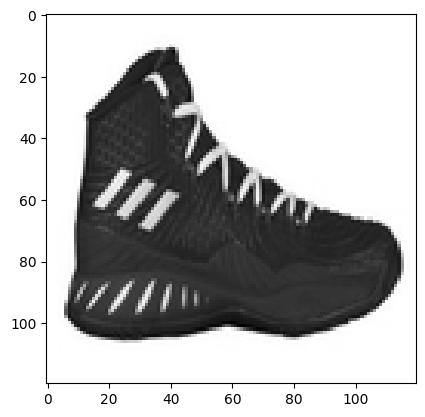

In [7]:
plt.imshow(train_data[35][0], cmap='gist_gray')
plt.show()

**CNN**

## CNN Model Architecture

The model consists of three convolutional blocks for feature extraction
followed by pooling layers to reduce spatial dimensions.

The extracted features are flattened and passed through a dense layer
before the final softmax output layer for binary classification.

* Input Shape: (120, 120, 1) - Grayscale images
* Activation Function: ReLU
* Output Activation: Softmax


In [13]:
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [14]:
model = Sequential()

# First Convolution Block
model.add(Conv2D(32,(5,5), activation='relu', input_shape=(120,120,1)))
# More feature extraction.
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Reduces image size. Keeps important features.
# Reduces computation. Prevents overfitting

# Second Convolution Block
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# 64 filters → detect more complex patterns
# Pooling again → reduce size

# STEP 5: Third Convolution Block
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# Now model learns high-level features (logo shapes).

# STEP 6: Flatten Layer
model.add(Flatten())
# Converts 2D feature maps into 1D vector. CNN → Dense layer connection

# STEP 7: Fully Connected Layer.
# 512 neurons → learn final patterns before classification.
model.add(Dense(512, activation='relu'))

# STEP 8: Output Layer
model.add(Dense(2, activation='softmax'))
#adidas or nike 2 options so last layer has 2 neurons.

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
x = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array([i[1] for i in train_data])

model.fit(x,y,epochs=20)
# -1 as dont know the no of rows here its 50 but for safer side we give -1
# image as input and label as output
# 1 in reshape pass each element 1 by 1

# accuracy will 99% if we increase epochs

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.5257 - loss: 3.5489
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5976 - loss: 0.6682
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6602 - loss: 0.5687
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.7401 - loss: 0.5184
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8527 - loss: 0.4084
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8374 - loss: 0.3764
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8141 - loss: 0.3675
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9512 - loss: 0.2583
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8553 - loss: 0.2841
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9845 - loss: 0.1683
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9632 - loss: 0.1703
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9540 - loss: 0.1176
Epoch 13/20
4

Accuracy improved after reducing learning rate - A high learning rate caused unstable weight updates, leading to divergence in training. Reducing the learning rate allowed smoother convergence toward the optimal minimum, improving stability and accuracy.

**Testing**

#### Testing on External Images

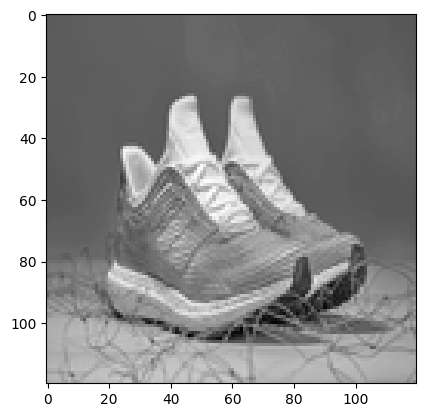

In [17]:
# Testing with google searched any addidas or nike image
# PIL
img = Image.open('/content/abc.webp')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE),Image.Resampling.LANCZOS)

plt.imshow(np.array(img), cmap='gist_gray')
plt.show()

In [18]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


array([[0.24222998, 0.75777   ]], dtype=float32)

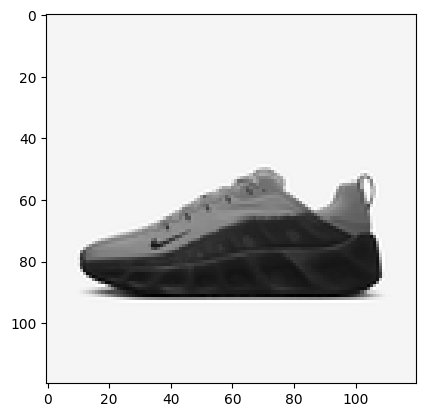

In [20]:
# Testing with google searched any addidas or nike image
# PIL
img = Image.open('/content/n.avif')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE),Image.Resampling.LANCZOS)

plt.imshow(np.array(img), cmap='gist_gray')
plt.show()

In [23]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.1355284, 0.8644716]], dtype=float32)

#### Project Conclusion:

This project demonstrates the implementation of a Convolutional Neural Network (CNN) for classifying Nike and Adidas shoe images using TensorFlow and Keras.

The model was trained on preprocessed grayscale images resized to a fixed dimension. The architecture consisted of multiple Conv2D and MaxPooling layers for feature extraction, followed by Flatten and Dense layers for classification. The learning rate was tuned to stabilize training and improve convergence. **The model achieved approximately 100% training accuracy
after learning rate tuning.**

🔹 Model Performance :
* Training accuracy reached approximately 100% after tuning the learning rate. * Loss decreased steadily across epochs, indicating stable learning.
* The model successfully captured distinguishing visual features between Nike and Adidas images.

🔹 External Image Testing Results:
* Two external images (one Nike and one Adidas) were tested on the trained model.
* These outputs represent class probabilities from the Softmax layer.
* Using argmax() to determine the predicted class, the model:
* Correctly classified the Adidas image and output is [[0.2422, 0.7577]]
* Correctly classified the Nike image and output is [[0.1355, 0.8644]]

* This confirms that the model generalizes well to unseen sample images.

🔹 Key Learnings:

*   Gained practical understanding of: CNN architecture and feature extraction
*   Image preprocessing (resizing, grayscale conversion, normalization)
*   Learning rate tuning and training stability
*   Softmax probability interpretation
*   Model evaluation and debugging techniques


🔹 Future Improvements

* Add validation split to monitor generalization performance

* Apply data augmentation to improve robustness

* Introduce Dropout layers to reduce overfitting

* Experiment with Transfer Learning (VGG16, ResNet)

* Deploy the model using Django/Flask for real-time prediction

This project strengthened my understanding of end-to-end deep learning workflow, from data preprocessing to model tuning and real-world testing.